## Problem 1: Set up Github and clone assignment repo. 


- Go to http://www.github.com and create an account.
- Send your Github username to dg2991@columbia.edu.
- Install Git - https://github.com/blog/1510-installing-git-from-github-for-mac. Make sure to install command line tools. 
- When I have received your email, you should get a confirmation that you have been added to the repo.
- Click on this link: https://classroom.github.com/assignment-invitations/11415026d0459793405d3c1ff95cc259
- Follow the instructions to clone that repo to your local machine.
- You should type a command like: 

```$ git clone https://github.com/Columbia-Intro-Data-Science/python-introduction-(your-github-username).git```


**Next:** Solve the problems directly in this notebook, and then push to the repo above (not to the course repo!)


The process should be to create a copy of this notebook, move it into the folder you created above. Then do this:

``` $ git add mynotebooksolutions.ipynb ```

``` $ git commit -m "added my homework" ```

``` $ git push origin master ```


## Problem 2: Sales Data Analysis

In [1]:
# read data into a DataFrame
import pandas as pd
import pylab as plt
import seaborn
from sklearn.linear_model import LinearRegression
from sklearn import preprocessing
import numpy.random as nprnd
import random
import json
import numpy as np
pd.set_option('display.max_columns', 500)
%matplotlib inline

df = pd.read_csv('http://www-bcf.usc.edu/~gareth/ISL/Advertising.csv', index_col=0)
df.head()

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [2]:
df[['TV','radio']]

,TV,radio
1,230.1,37.8
2,44.5,39.3
3,17.2,45.9
4,151.5,41.3
5,180.8,10.8
6,8.7,48.9
7,57.5,32.8
8,120.2,19.6
9,8.6,2.1
10,199.8,2.6



#### What are the features?

- **TV:** advertising dollars spent on TV for a single product in a given market (in thousands of dollars)
- **Radio:** advertising dollars spent on Radio
- **Newspaper:** advertising dollars spent on Newspaper

#### Goal: Predict the number of sales in a given market based on the advertising in TV, Radio and Newspaper.


### Problem 2, Part 0: Plot box plots of the coefficient ranges

Use df.boxplot()

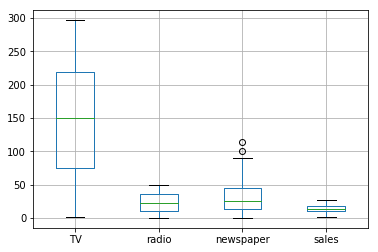

In [3]:
df.boxplot()

### Problem 2, Part 1: Create scatter plots using plt.scatter() 

Create scatter plots of the advertising dollars spent on TV, Radio and Newspaper to the total Sales dollars gained. Fill in the parameter for scatter() below, and simply 

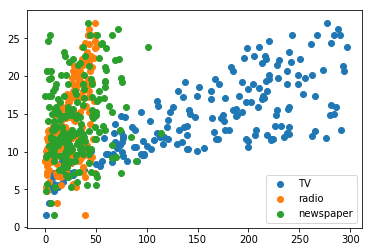

In [4]:
plt.scatter(df['TV'], df['sales'], label="TV")
plt.scatter(df['radio'], df['sales'], label="radio")
plt.scatter(df['newspaper'], df['sales'], label="newspaper")
plt.legend()
plt.show()

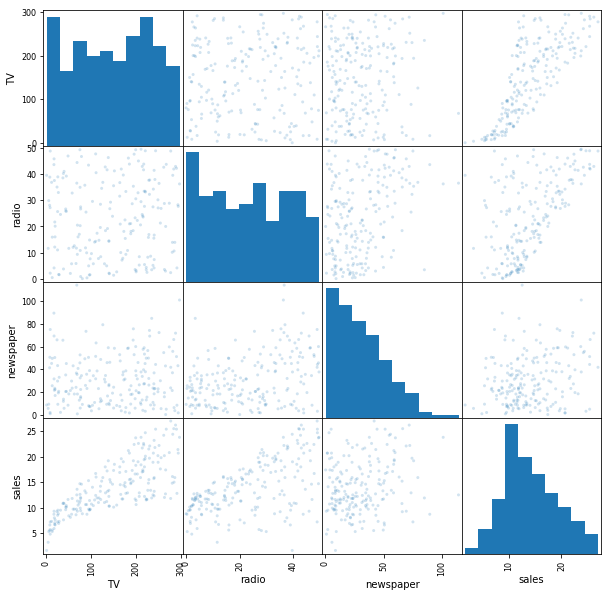

In [5]:
# from pandas.tools.plotting import scatter_matrix 
from pandas.plotting import scatter_matrix
scatter_matrix(df, alpha=0.2, figsize=(10, 10), diagonal='hist')
plt.show()

Which of the variables seem correlated with one another? Which don't? Explain your answer

**Answer:** For TV and Radio, there seems to be a slight positive correlation between advertising dollars spent and the total sales gained. If you look at the TV vs sales and the radio vs sales plots, you can see the values have a positive slope. However, there seems to be no correlation between any of the other features with another. These plots show no trend. 

### Probelm 2, Part 2: Predict sales using sklearn

- Split data into training and testing subsets.
- Train model using LinearRegression() from sklearn.linear_model on training data.
- Evaluate using RMSE and R^2 on testing set


If you need help, please refer to this example:

https://github.com/Columbia-Intro-Data-Science/APMAE4990-/blob/master/notebooks/Lecture%202%20-%20Regression%20Bookingdotcom%20Case%20Study.ipynb

See where I split the data into testing/training and evalaute performance. 

In [6]:
from sklearn.linear_model import LinearRegression

a) Set y to be the sales in df

In [7]:
# Code here
y = df['sales']

b) Set X to be just the features described above in df

In [8]:
# Code here
X = df[['TV','radio','newspaper']]

c) Randomly split data into training and testing - 80% training, 20% testing.

In [9]:
# Code here
size=200

X_train = X[0:int(size*0.8)]
X_test = X[int(size*0.8):]

y_train = y[0:int(size*0.8)]
y_test = y[int(size*0.8):]

d) Train model on training data, and make predictions on testing data

In [10]:
# Code here
regr = LinearRegression()
regr.fit(X_train, y_train)
predictions = regr.predict(X_test)
print("x testing data predict", predictions)

x testing data predict [ 14.32760252  13.3931802   15.08372563  17.28887207  11.126712
  14.56130444  10.53949868  13.63802366  17.31889273  18.28391286
   7.38133999  14.43760126   7.475535    12.17162591  14.05724444
  24.79183962  20.10091117  12.36147775  16.4151118   12.55656227
  10.80865053  14.21930496   6.6020951   24.20757492  18.74560913
  20.73166888   9.89340209  17.12546566  18.96053303   5.98759002
  12.20478737   8.45403738   4.46959444  18.38398588  16.42220846
   5.40672422   8.2741292   12.97986443  23.84393137  15.4553381 ]


e) Evalute the R^2 on **testing** data. Is this good? Bad? Why?

**Answer:** This is a good R^2 value, because it is close to 1 which is the perfect prediction. Roughly 89.5% of the data is fitted by the linear regression. 

In [11]:
# Code here
r_score = regr.score(X_test, y_test)
print("R^2: " + str(r_score))

R^2: 0.895478287922


f) Make a scatter plot of your predictions vs the actual values on the testing data. Does it look like a good model?

**Answer:** Yes, the model looks good because the line fits the data well. It doesn't seem to be overfitting or underfitting the data. 

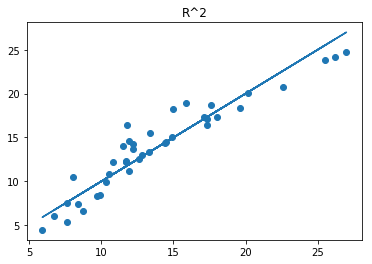

In [12]:
# Code here
plt.title('R^2')
plt.scatter(y_test, regr.predict(X_test))
plt.plot(y_test,y_test)
plt.show()

g) Can you measure the importance of features in this model? What is something you should check before making conclusions?

Try looking at LinearRegression().coef_

**Answer:** The coefficient values represent the mean change in total sales for one unit of change in advertising dollar while holding the feature constant. Thus by looking at the coefficient values, you can compare the importance of features in the model. You need to make sure that the data is normalized before making conclusions. To compare the coefficients, we need to normalize the columns to have the same scale.

In [13]:
coeff = regr.coef_
print('Before normalizing data')
print('TV coefficient: ', coeff[0])
print('radio coefficient: ', coeff[1])
print('newspaper coefficient: ', coeff[2])

Before normalizing data
TV coefficient:  0.0472520953737
radio coefficient:  0.179922000177
newspaper coefficient:  -0.000944077396472


In [14]:
# Code/explanation here
df = (df - df.mean())/(df.max()-df.min())
y = df['sales']
X = df[['TV','radio','newspaper']]

size=200

X_train = X[0:int(size*0.8)]
X_test = X[int(size*0.8):]

y_train = y[0:int(size*0.8)]
y_test = y[int(size*0.8):]

regr = LinearRegression()
regr.fit(X_train, y_train)

coeff = regr.coef_
print('After normalizing data')
print('TV coefficient: ', coeff[0])
print('radio coefficient: ', coeff[1])
print('newspaper coefficient: ', coeff[2])

After normalizing data
TV coefficient:  0.550096244174
radio coefficient:  0.351343748377
newspaper coefficient:  -0.00422604724326


h) What can you conclude from g) - can you think of a way to interpret the result? What should we have done to measure the importance of the features involved?

**Answer:** From comparing the coefficients of the different features, TV is the most important feature followed by radio and then newspaper. The sales changed by an average of 0.55 for every additional unit of advertising dollar for TV, 0.35 for radio, and -0.004 for newspaper. The coefficient for newspaper is close to zero, indicating that for the newspaper feature, the advertising doesn't effect the sales. This analysis was done on normalized data, meaning the scales across the features were standardized so that we could compare the values correctly. If you look at the coefficients before normalizing the data, it looks as if radio is the most important feature, which is not true. 

## How could you have improved performance?

*Hint:* Try plotting the data in three dimensions along with the hyperplane solution, and see if you can infer
a new variable which will help, or try a nonlinear/non-parametric model

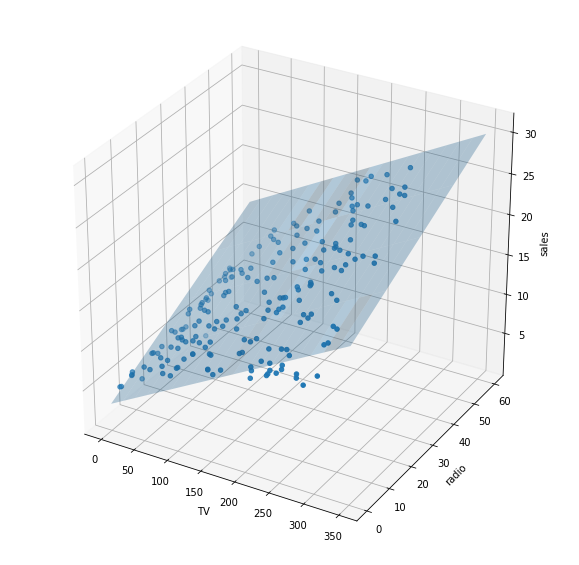

In [37]:
# Type your answer here. 
from mpl_toolkits.mplot3d import Axes3D
df = pd.read_csv('http://www-bcf.usc.edu/~gareth/ISL/Advertising.csv', index_col=0)

y = df['sales']
X = df[['TV','radio']]

regr = LinearRegression()
regr.fit(X, y)

fig = plt.figure(figsize=(10,10))
ax = fig.gca(projection='3d')
ax.scatter(X['TV'], X['radio'], y)

x_new = np.linspace(0,350,20)
y_new = np.linspace(0,60,5)
x_new, y_new = np.meshgrid(x_new,y_new)

d = {'TV': x_new.flatten(), 'radio': y_new.flatten()}
df2 = pd.DataFrame(data=d)

z = regr.predict(df2[['TV','radio']])
z = z.reshape(x_new.shape)

surf = ax.plot_surface(x_new, y_new, z, alpha=0.3)

ax.set_xlabel('TV')
ax.set_ylabel('radio')
ax.set_zlabel('sales')
plt.show()

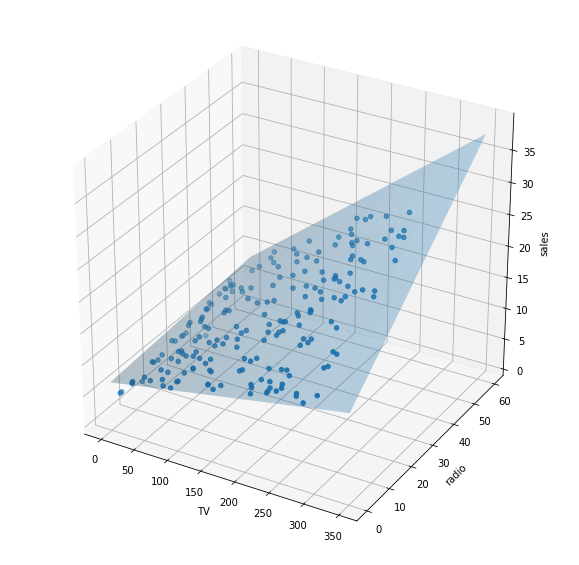

In [36]:
TV_radio = df['TV']*df['radio']
df['TV*radio'] = TV_radio
y = df['sales']
X = df[['TV','radio','TV*radio']]

regr = LinearRegression()
regr.fit(X, y)

fig = plt.figure(figsize=(10,10))
ax = fig.gca(projection='3d')
ax.scatter(X['TV'], X['radio'], y)

x_new = np.linspace(0,350,20)
y_new = np.linspace(0,60,5)
x_new, y_new = np.meshgrid(x_new,y_new)
tv_r = x_new * y_new 

d = {'TV': x_new.flatten(), 'radio': y_new.flatten(), 'TV*radio': tv_r.flatten()}
df2 = pd.DataFrame(data=d)

z = regr.predict(df2[['TV','radio','TV*radio']])
z = z.reshape(x_new.shape)

surf = ax.plot_surface(x_new, y_new, z, alpha=0.3)

ax.set_xlabel('TV')
ax.set_ylabel('radio')
ax.set_zlabel('sales')
plt.show()

**Answer:** With the non-linear model, I included a new variable to the model, TV x radio. I added this new feature to the dataframe and trained the model again. By adding an additional variable, the model now fits the data slightly better than before. This can be seen in the new 3D plot. The new model covers pretty much all of the data points, notably the points around (100,40,0) which were previously not covered in the model without the additional variable. 

## Problem 3:  Gradient Descent and the learning rate

By modifying the learning rate below, show how the convergence takes longer or doesn't converge at all.
Can you explain in words or math why this is?

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 100 iterations b = 0.03507497059234178, m = 1.4788027175308358, error = 112.64705664288809


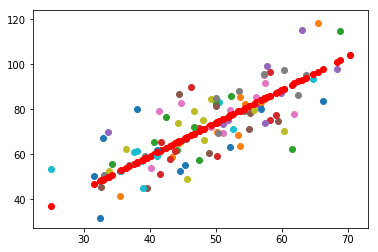

In [117]:
from numpy import *

# y = mx + b
# m is slope, b is y-intercept
def compute_error_for_line_given_points(b, m, points):
    totalError = 0
    for i in range(0, len(points)):
        x = points[i, 0]
        y = points[i, 1]
        totalError += (y - (m * x + b)) ** 2
    return totalError / float(len(points))

def step_gradient(b_current, m_current, points, learningRate):
    b_gradient = 0
    m_gradient = 0
    N = float(len(points))
    for i in range(0, len(points)):
        x = points[i, 0]
        y = points[i, 1]
        b_gradient += -(2/N) * (y - ((m_current * x) + b_current))
        m_gradient += -(2/N) * x * (y - ((m_current * x) + b_current))
    new_b = b_current - (learningRate * b_gradient)
    new_m = m_current - (learningRate * m_gradient)
    return [new_b, new_m]

def gradient_descent_runner(points, starting_b, starting_m, learning_rate, num_iterations):
    b = starting_b
    m = starting_m
    for i in range(num_iterations):
        b, m = step_gradient(b, m, array(points), learning_rate)
    return [b, m]

def run(num_iterations):
    points = genfromtxt("../data/data.csv", delimiter=",")
    learning_rate = 0.0001
    initial_b = 0 # initial y-intercept guess
    initial_m = 0 # initial slope guess
    num_iterations = num_iterations
    print("Starting gradient descent at b = {0}, m = {1}, error = {2}".format(initial_b, initial_m, compute_error_for_line_given_points(initial_b, initial_m, points)))
    print("Running...")
    [b, m] = gradient_descent_runner(points, initial_b, initial_m, learning_rate, num_iterations)
    print("After {0} iterations b = {1}, m = {2}, error = {3}".format(num_iterations, b, m, compute_error_for_line_given_points(b, m, points)))
    for i in range(0,len(points)):
        plt.scatter(points[i,0],points[i,1])
        plt.scatter(points[i,0],m*points[i,0]+b,color='r')

run(100)

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 0 iterations b = 0, m = 0, error = 5565.107834483211


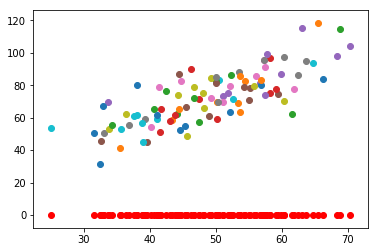

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 1 iterations b = 0.014547010110737297, m = 0.7370702973591052, error = 1484.586557408649


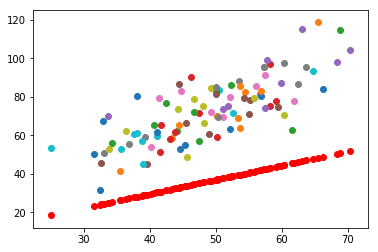

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 2 iterations b = 0.02187396295959641, m = 1.1067954543515157, error = 457.8542575737673


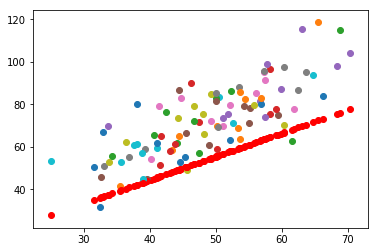

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 3 iterations b = 0.025579224321293136, m = 1.2922546649131115, error = 199.50998572553894


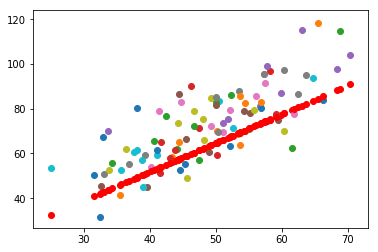

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 4 iterations b = 0.027467789559144355, m = 1.385283255651245, error = 134.50591058200533


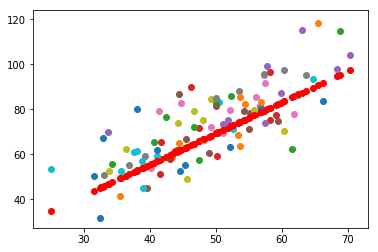

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 5 iterations b = 0.028445071981738963, m = 1.4319472323843205, error = 118.14969342239947


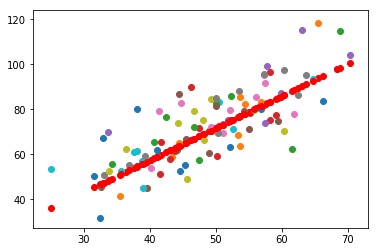

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 6 iterations b = 0.02896524076647862, m = 1.4553540088980408, error = 114.0341490603815


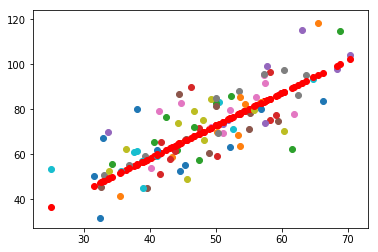

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 7 iterations b = 0.0292561141260467, m = 1.4670946177201354, error = 112.99857731713661


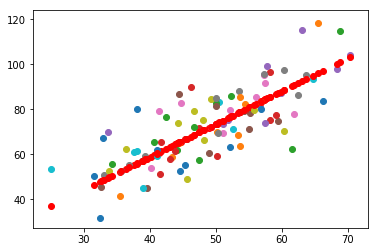

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 8 iterations b = 0.02943196916380713, m = 1.4729832982243762, error = 112.7379818756847


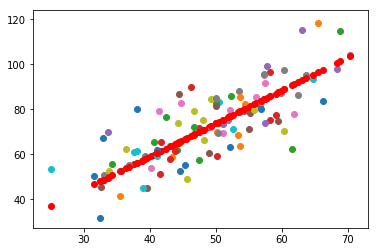

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 9 iterations b = 0.029550129024383073, m = 1.4759365618962286, error = 112.67238435909097


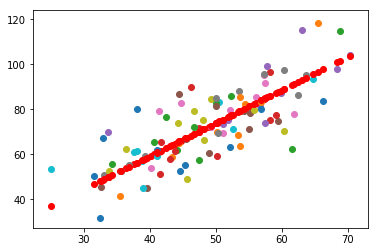

In [85]:
# Use this to visually discuss convergence rate based on learning rate

for num in range(0,10):
   run(num)
   plt.show()

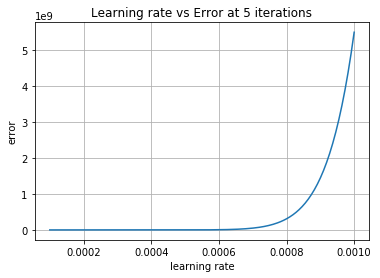

In [124]:
points = genfromtxt("../data/data.csv", delimiter=",")
learning_rate = np.linspace(0.0001,0.001,200)
initial_b = 0
initial_m = 0
iteration = 5
error = []

for i in learning_rate:
    [b, m] = gradient_descent_runner(points, initial_b, initial_m, i, iteration)
    error.append(compute_error_for_line_given_points(b, m, points))

plt.plot(learning_rate, error)
plt.xlabel('learning rate')
plt.ylabel('error')
plt.title('Learning rate vs Error at 5 iterations')
plt.grid()
plt.show()

**Answer:** The learning rate controls how large of a step is taken for each iteration. A learning rate that is too big will overstep the minimum. A learning rate that is too small will take too many iterations to reach the minimum. From the learning rate vs error graph, you can see that once you are at learning rate past 0.0006, the error exponentially increases and doesn't converge. This means that at that point, the learning rate step is too large and skips past the minimum. 

## Problem 3 Part 2

Plot the error as a function of the number of iterations for various learning rates. Choose the rates
so that it tells a story.

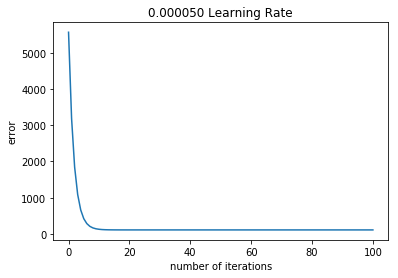

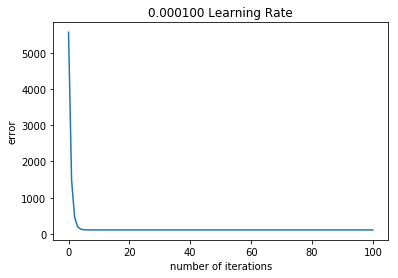

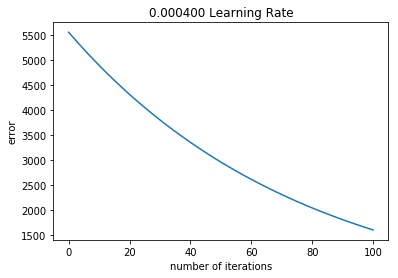

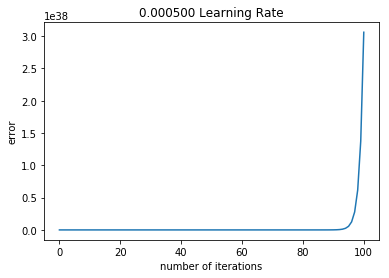

In [127]:
def error_plot(learning_rate):
    points = genfromtxt("../data/data.csv", delimiter=",")
    iteration = np.arange(101)
    initial_b = 0
    initial_m = 0
    error = []
    
    for i in range(0,101):
        [b, m] = gradient_descent_runner(points, initial_b, initial_m, learning_rate, i)
        error.append(compute_error_for_line_given_points(b, m, points))
        
    plt.plot(iteration, error)
    plt.xlabel('number of iterations')
    plt.ylabel('error')
    plt.title('%f Learning Rate' % learning_rate)
    plt.show()
    
error_plot(0.00005)
error_plot(0.0001)
error_plot(0.0004)
error_plot(0.0005)

**Answer:**

**Learning Rate: 0.00005** 
At this learning rate, there is a fast convergence. The plot shows the error decreasing and the converging occuring pretty quickly at around 10 iterations.

**Learning Rate: 0.0001**
At this learning rate, there is an even faster convergence. Already after a couple of iterations, the error drastically decreases.

**Learning Rate: 0.0004**
At this learning rate, there is a slower convergence, which is much slower than that of the 0.00005 and 0.0001 learning rate. After 100 iterations, the error is still decreasing.

**Learning Rate: 0.0005** 
At this learning rate, there is no convergence. The error actually increases after roughly 90 iterations. 